## 1. 문제 정의

- 데이터분석가를 희망합니다.
- 파이썬과 R을 많이 언급하는데, 두 언어를 익히면 충분한지, 아니면 다른 언어를 학습해야하는지요
- 데이터 분석을 통해 대표적인 프로그래밍언어 항목간 연관관계를 분석해보고 싶음

## 2. 배경 지식
### 2.1 연관 규칙 분석(Association Rule Analysis)
- 상품이나 서비스를 구매하는 등의 일련의 거래나 사건 안에서 존재하는 항목간의 연관 규칙을 발견하는 분석
- 장바구니 분석(Market Basket Analysis)라고도 함
- 고객이 어떤 상품을 구매할 때 함께 구매할 가능성이 높은 상품을 특정할 수 있어 붙여진 이름
- <h4> A를 구매하면 B를 구매할 가능성이 높다.</h4>

### 2.2 연관 규칙을 측정하는 3가지 지표
1. 지지도(support)
 - 전체 거래 중 A와 B가 동시에 판매되는 거래의 비율
 - 전체 거래 1,000건 중 기저기와  맥주를 동시에 산 건수가 50건인 경우, 지지도는 5%
 - 좋은 규칙을 찾거나 불필요한 연산을 줄이기 위한 기준으로 사용(지지도가 낮은 연관관계는 추천 배제)
 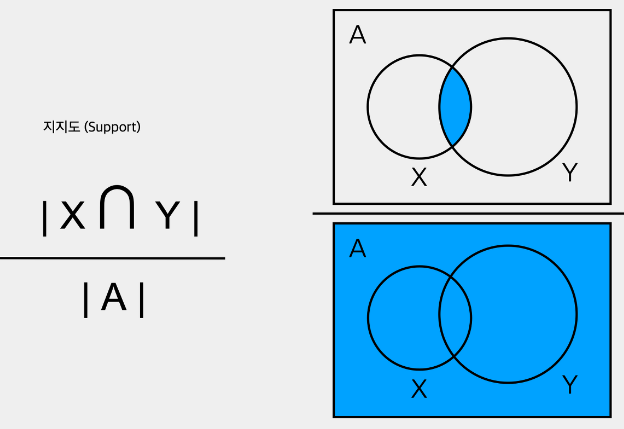
  
2. 신뢰도(Confidence)
 - A를 구매한 사람이 B를 함께 구매한 거래의 비율
 - A를 구매한 100건 중 B도 함께 구매한 건수가 50건이라면 신뢰도는 50%
 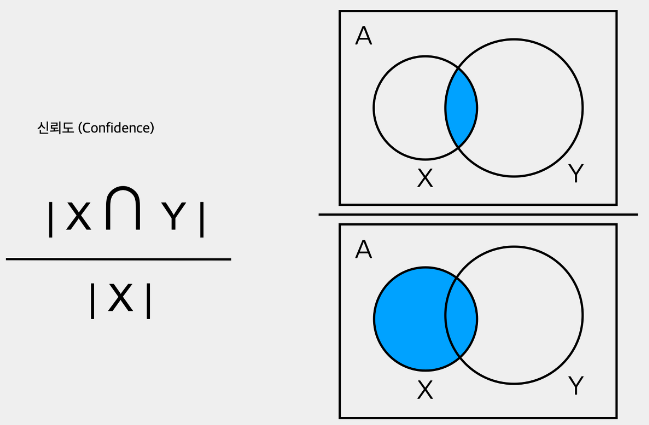
 
3. 향상도(Lift)
 - 전체 건수에서 B를 구매한 비율 대비A를 구매했을 때 B를 구매한 비율(신리도)의 증가 비율
 - A 구매 유무와 상관 없이 B를 구매한 비율은 전체 1000건 중 200건이면 20%
 - A를 구매했을 때 B 도 함께 구매한 건수가 50건이라면 신뢰도는 50%
 - 향상도는 50%/20%로 2.5임. A를 구매했을 때 B를 구매할 확률이 그냥 B를 구매할 확률에 비해 2.5배 높다.
 - 많이 팔리는 인기 상품을 골라 낼때 활용(신뢰도가 높은 상품이라도 인기 상품일 경우 추천하지 않음)
 - (예) 마트에서의 쓰레기 봉투 : 모든 상품 구매시 함께 구매하는 인기 상품으로 향성도 높음
 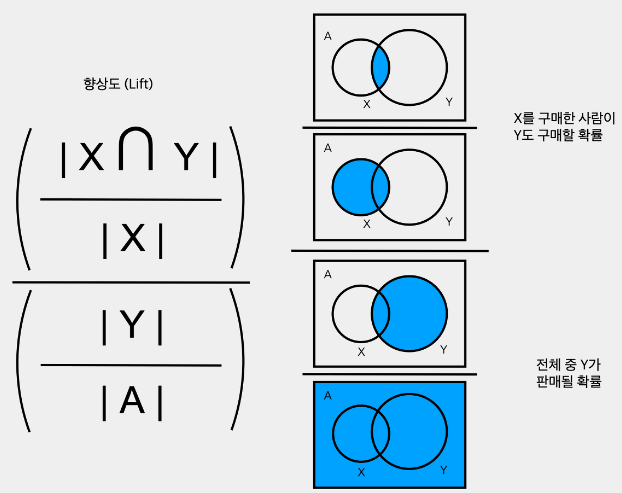

## 연관분석 예

1. 장바구니 데이터 (영수증 데이터)
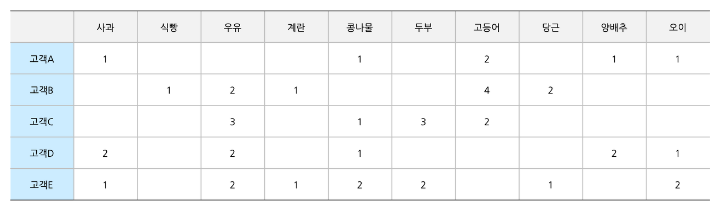

2. 데이터 1차 가공
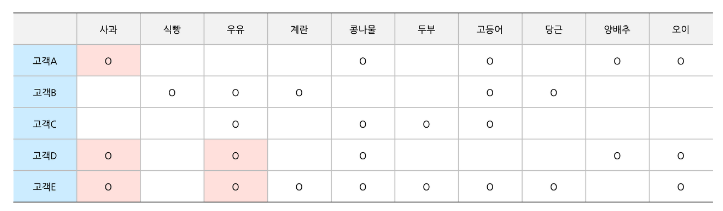

3. 지지도 50%로 설정 
 - 5명 고객 중 3명 이상 구매한 이력 상품만 분석 : 50% 이하 배제
 - (사과, 우융, 콩나물, 고등어, 오이)만 분석
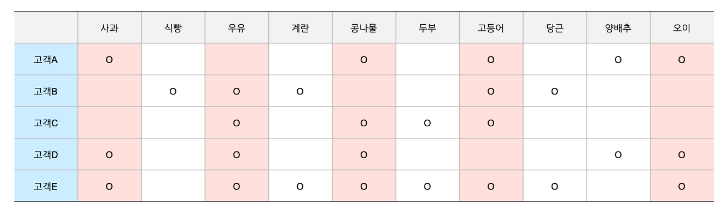

4. 신뢰도, 향상도(인기도) 구하기
- (예) 신뢰도 : 사과를 구매한 3명 고객 중, 우유를 함께 구매한 고객은 2명( 신뢰도 2/3 = 67% )
- (예) 인기도 : 전체 고객 5명 중 사과를 구매한 고객 3명 비율 (3/5 = 60%) 
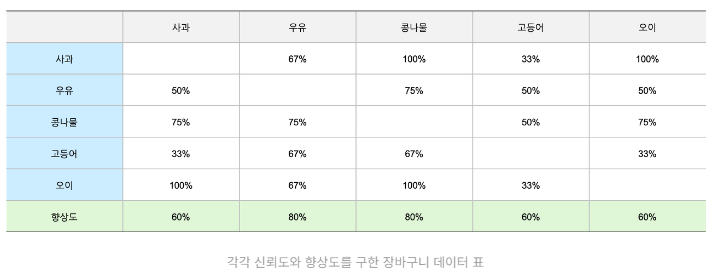

5. 신뢰도 60% 이상이고, 향상도 1 이상인 상품만 추출
- 신뢰도가 60% 이하인 흰색 셀 배제
- 인기도보다 신뢰도가 낮은 주황색 셀 배제
- 분홍색 셀 (사과, 콩나물, 오이)만 분석
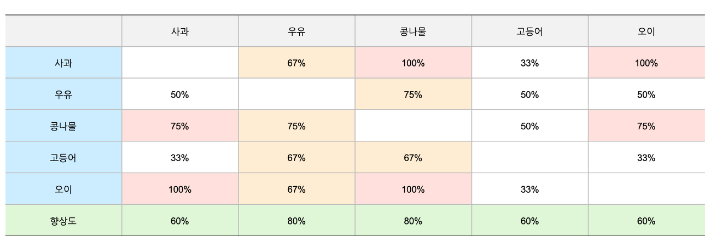

6. 분석
- 사과 구매자에게 콩나물, 오이 추천
- 콩나물 구매자에게 사과, 오이 추천
- 오이 구매자에게 사과 콩나물 추천

### 2.3 어프라이어 (Apriori)
1. 연관 규칙을 추출하려면, 각 항목이 각 항목 집합 안에서 어떤 빈도로 출현했고 어떤 항목과 함께 출현했는지 파악해야 함
2. 데이터 셋이 큰 경우, 모든 후보 항목 집합을 하나씩 검사하는 것은 매우 비효율적
3. 어프라이어(Apriori) : 이 문제를 해결하기 위한 알고리즘
 - '빈발항목 집합'을 추출
 - 빈발항목 : 지지도가 최소 이상인 집합
 - 최소 지지도를 설정하고, 그 이상인 값만 찾아 연관 규칙을 생성

### 2.3 어프라이어 (Apriori) 설치
1. ananconda prompt를 관리자 권한으로 생성
 > conda install -c conda-forge mlxtend
 
2. 워드 클라우드도 설치
  > conda install -c conda-forge wordcloud

## 3. 데이터 수집 및 가공
- stack overflow 설문데이터를 통한 연관 관계 분석
- Python 언어를 활용하는 데이터 분석가와 연계성이 많은 언어는 ? 

In [ ]:
import pandas as pd

# csv 파일 읽어오기 
raw_data = pd.read_csv('survey_results_public.csv')

# 데이터프레임 정보 확인하기
raw_data.info()

In [ ]:
# raw_data 확인하기
raw_data.head()

### 개발자 유형 데이터 추출
- 데이터 분석가 개발자 유형을 추출하려고함

In [ ]:
# 데이터 분석에 필요한 데이터만 추출
# 개발자 타입 변수 확인하기
raw_data['DevType'].head(20)

In [ ]:
# 문자열을 리스트로 변환
dev_type = raw_data['DevType'].str.split(';')
dev_type

In [ ]:
# 결손치 제거
dev_type.dropna(inplace=True)
dev_type

In [ ]:
# explod()를 활용하여 리스트의 각 항목을열로 나누기
exploded_dev_type = dev_type.explode()
exploded_dev_type

In [ ]:
exploded_dev_type.unique()

### 개발자 유형 중 데이터분석가 유형을 찾아냄
- 개발자 유형 중, 데이터 분석가로 볼 수 있는 항목은
- 'Data scientist or machine learning specialist', 'Data or business analyst'로 보임

In [ ]:
# 데이터 분석가 항목만 추출
data_analyst_data = raw_data[raw_data['DevType'].isin(['Data scientist or machine learning specialist','Data or business analyst' ])]

# 데이터 항목 값 확인하기
data_analyst_data['DevType']

In [ ]:
data_analyst_data.head()

### 데이터분석가가 사용하는 프로그래밍 언어 데이터만 추출하기

In [ ]:
# 프로그래밍 언어 데이터 추출
languages = data_analyst_data['LanguageHaveWorkedWith']
languages

In [ ]:
# 데이터 문자열 변환 후 구분자(';')로 나눔
languages = languages.str.split(';')
languages

In [ ]:
# 리스트 항목을 행으로 나누기
exploded_languages = languages.explode()
exploded_languages

In [ ]:
# groupby()를 이용하여 프로그래밍 언어별 빈도 구하기
size_by_language = exploded_languages.groupby(exploded_languages).size()

# 데이터를 빈도 역순으로 정렬
size_by_language.sort_values(ascending=False, inplace=True)
size_by_language

In [ ]:
# 데이터프레임으로 변경
size_by_language_df = pd.DataFrame({'language' : size_by_language.index, 'count' : size_by_language.values})

size_by_language_df.head()

## 4. 워드 클라우드와 트리맵
- 데이터분석가가 사용하는 언어을 시각화

In [ ]:
import matplotlib.pyplot as plt

# wordCloud 패키지 탑재
from wordcloud import WordCloud 

In [ ]:
# 데이터프레임(시리즈)을 딕셔너리로 변환
size_by_language.to_dict()

In [ ]:
# wordcloud 만들기
wordcloud = WordCloud(background_color='white').generate_from_frequencies(size_by_language.to_dict())
wordcloud

In [ ]:
# wordcloud 그리기
plt.rcParams['figure.figsize'] = (10,10)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Tree Map 그리기

In [ ]:
import plotly.express as px

# tree map 그리기
fig = px.treemap(size_by_language_df, path=['language'], values='count')
fig.show()

## 5. 데이터 학습 및 시각화


### 5.1 데이터 2차 가공
#### 프로그래밍 언어 10개를 선정하여 데이터 분석가가 사용하는 언어와 연계성을 분석

In [ ]:
# 결손치 제거
languages.dropna(inplace=True)

# 필터링을 위해 리스트로 변환
lang_list = languages.to_list()

# 일부 값 확인
lang_list[:10]

#### 데이터 분석가가 사용하는 언어와 연계성을 분석하기 위한 10개 언어 선정

In [ ]:
# 데이터 분석가가 되기 위해 배워야할 프로그래밍 언어
# 구글 검색을 통해 10개 선정

target_langs = ['Python', 'R', 'SQL', 'MATLAB', 'Go', 'SAS', 'Scala', 'Julia', 'Java', 'JavaScript']

#### 데이터 분석가가 사용하는 언어 중, 연계성을 분석하기 위한 10개 언어 사용 내역만 추출

In [ ]:
# 필터링이 완료된 언어를 담기 위한 리스트 생성
revised_lang_list = []

# 필터링을 위한 전체 리스트 순회
for lang in lang_list:
    filtered = [x for x in lang if x in target_langs]
    revised_lang_list.append(filtered)
    
revised_lang_list

### 연관 분석 (Apriori)- 데이터 전처리
- 리스트를 2차원 행렬로 변경
- 10개 언어에 대해 2차원 배열로 표현
- 장바구니 생성

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# 전처리기 생성
te = TransactionEncoder()

# 전처리기 수행
te_ary = te.fit(revised_lang_list).transform(revised_lang_list)
te_ary

In [ ]:
# 전처리 결과를 데이터프레임으로 변환
new_language = pd.DataFrame(te_ary, columns=te.columns_)
new_language

### 5.2 Apriori 연관성 분석을 위한 데이터 학습하기

#### 지지도 구하기

In [ ]:
# 학습 알고리즘 탑재
from mlxtend.frequent_patterns import apriori, association_rules

# 지지도 구하기 : 최소 지지도 0.01 이상 데이터만 추출
freq_items = apriori(new_language, min_support=0.01, use_colnames=True, verbose=1)

In [ ]:
# 학습 결과 확인하기
freq_items.sort_values(['support'], ascending=False).head(20)

#### 신뢰도와 향상도 구하기

In [ ]:
# 항목 집합의 항목 개수 추가하기
freq_items['length'] = freq_items['itemsets'].apply(lambda x : len(x))
freq_items

In [ ]:
# 신뢰도와 향상도 구하기
# antecedents : 조건이 되는 프로그래밍 언어 리스트
# consequents : 결과가 되는 프로그래밍 언어 리스트
# support : 지지도
# confidence : 신뢰도
# lift : 향상도
rules = association_rules(freq_items, min_threshold=0.01)
rules.head(20)

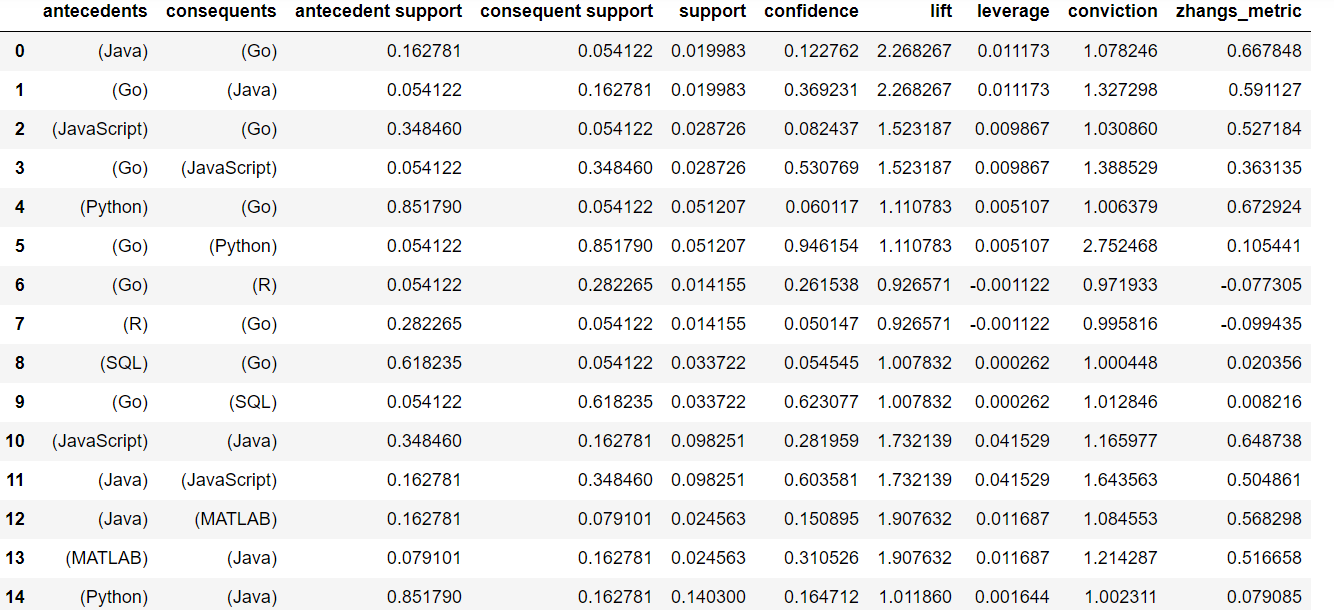
- Python를 다루는 데이터분석가가 Java를 함께 다룰 가능성, 즉 전체 데이터에서 Python과 JAVA를 함께 다룰 가능성(지지도)는 14%(0.1403)이다
- Python를 다루는 데이터분석가가 Java를 함께 다룰 가능성(신뢰도)는 16%(0.164712)이다.
- 전체 데이터 분석가가 Java를 함께 다룰 가능성에 비해, Python를 다루는 데이터분석가가 Java를 함께 다룰 가능성(향상도)은 약 1.01배 높다 

### 산점도 그래프 그리기
- 두 변수의 관계를 알아보기
- x축에 한 변수를, y축에 다른 변수를 설정, 각 변수의 값을 나타내는 점을 찍어 두 변수의 관계 파악
- px.scatter() : x출-지지도, y축-신뢰도, 향상도는 점의 크기와 색으로 구분

In [ ]:
# 산점도 그래프 그리기
rules_for_single = rules[rules.apply(lambda x : (len(x['antecedents']) == 1 and len(x['consequents']) == 1), axis=1)]
rules_for_single

In [ ]:
rules_for_single_df = pd.DataFrame(rules_for_single['antecedents'].apply(lambda x : list(x)[0]))
rules_for_single_df['consequents'] = rules_for_single['consequents'].apply(lambda x : list(x)[0])
rules_for_single_df['confidence'] = rules_for_single['confidence']
rules_for_single_df['lift'] = rules_for_single['lift']

rules_for_single_df

In [ ]:
rules_for_single_df[rules_for_single_df['antecedents'] == 'Python']

In [ ]:
reviced_rules_df = pd.DataFrame(index=target_langs)

for col in target_langs :
    col_conf = []
    for row in target_langs :
        confidence = rules_for_single_df[rules_for_single_df['antecedents'] == row] \
                                        [rules_for_single_df['consequents'] == col]['confidence']
        if len(confidence.values) > 0 :
            col_conf.append(confidence.values[0])
        else :
            col_conf.append(0)
    reviced_rules_df[col] = col_conf
reviced_rules_df

In [ ]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

heatmap = sns.heatmap(reviced_rules_df, annot=True)